#Введение в глубинное обучение. Полносвязные слои.

In [109]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch import nn
from tqdm.auto import tqdm
from torch.utils.data import random_split

In [121]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float)
        self.y = torch.tensor(y, dtype=torch.float).reshape(-1, 1)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = self.x[idx, :]
        target = self.y[idx]
        return sample, target

In [122]:
x = np.random.rand(5000, 5)
y = x[:, 0] + x[:, 1] + x[:, 2] ** 2

my_dataset = RandomDataset(x, y)
dataloader = torch.utils.data.DataLoader(my_dataset, batch_size=16)

In [123]:
train_data, val_data = random_split(my_dataset, [4000, 1000])

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=64)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=64)

In [124]:
model = nn.Sequential()
model.add_module('l1', nn.Linear(5, 20))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(20, 1))

In [125]:
def train(model, loss_func, optimizer, train_dloader, val_dloader, epochs):
  for epoch in range(epochs):
    train_loss = []
    for x_train, y_train in tqdm(train_dloader):
      y_pred = model(x_train)
      loss = loss_func(y_pred, y_train)
      train_loss.append(loss.detach().numpy())
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    val_loss = []
    with torch.no_grad():
      for x_val, y_val in val_dloader:
        y_pred = model(x_val)
        loss = loss_func(y_pred, y_val)
        val_loss.append(loss.numpy())
    print(f'Epoch {epoch} : train loss - {np.mean(train_loss)}, validation loss - {np.mean(val_loss)}')

In [126]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.05) 
mse = F.mse_loss

In [127]:
train(model, mse, optimizer, train_dataloader, val_dataloader, 15)

  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 0 : train loss - 0.1348314881324768, validation loss - 0.006133697461336851


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 1 : train loss - 0.00545176025480032, validation loss - 0.004385052248835564


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 2 : train loss - 0.0044557335786521435, validation loss - 0.0028365659527480602


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 3 : train loss - 0.0022098661866039038, validation loss - 0.0011703177588060498


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 4 : train loss - 0.0008940811385400593, validation loss - 0.0005141162546351552


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 5 : train loss - 0.0005354128079488873, validation loss - 0.0004977096104994416


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 6 : train loss - 0.00042562055750750005, validation loss - 0.00045897200470790267


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 7 : train loss - 0.0004159999080002308, validation loss - 0.0005313220317475498


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 8 : train loss - 0.00043637349153868854, validation loss - 0.0006038856809027493


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 9 : train loss - 0.00043988379184156656, validation loss - 0.0004682076978497207


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 10 : train loss - 0.0004318532592151314, validation loss - 0.0005344751989468932


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 11 : train loss - 0.0004391152469906956, validation loss - 0.0006890043732710183


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 12 : train loss - 0.00046402408042922616, validation loss - 0.0008663490880280733


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 13 : train loss - 0.0004762766184285283, validation loss - 0.0007511426229029894


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch 14 : train loss - 0.00044186515151523054, validation loss - 0.0004605937283486128


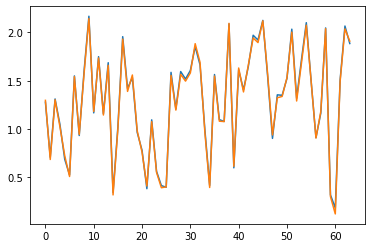

In [128]:
model.eval()
x, y = next(iter(val_dataloader))
y_pred = model(x)

plt.plot(y_pred.detach().numpy())
plt.plot(y)

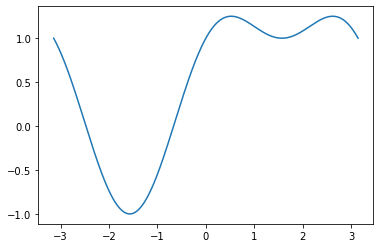

In [131]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x) + torch.cos(x) ** 2

plt.plot(x, y)

In [132]:
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [133]:
xx = torch.stack([torch.sin(x), torch.cos(x)], dim=1)

In [138]:
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Flatten(0, 1)
)

loss_fn = nn.MSELoss(reduction='sum')

learning_rate = 1e-04
for t in range(7500):
  y_pred = model(xx)

  loss = loss_fn(y_pred, y)
  if t % 1000 == 999:
    print(t, loss.item())

  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad

linear_layer = model[0]

999 0.5922536253929138
1999 0.13740456104278564
2999 0.07462113350629807
3999 0.051186852157115936
4999 0.0376441590487957
5999 0.033373720943927765
6999 0.027830980718135834


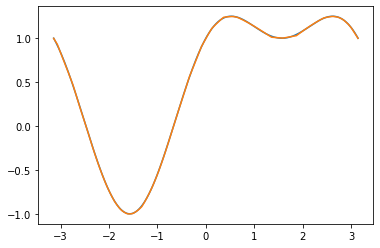

In [143]:
y_pred = model(xx)
y_pred.detach().numpy()

plt.plot(x, y)
plt.plot(x, y_pred.detach().numpy())

In [150]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x) - torch.cos(x) + torch.sin(x) * torch.cos(x)

xx = torch.stack([torch.sin(x), torch.cos(x), x], dim=1)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 12),
    torch.nn.ReLU(),
    torch.nn.Linear(12, 6),
    torch.nn.ReLU(),
    torch.nn.Linear(6, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-03
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(8000):
  y_pred = model(xx)

  loss = loss_fn(y_pred, y)
  if t % 1000 == 999:
    print(t, loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

999 2.3475747108459473
1999 0.5704832077026367
2999 0.445279598236084
3999 0.3968857228755951
4999 0.3732645511627197
5999 0.3590677082538605
6999 0.34481751918792725
7999 0.3350435197353363


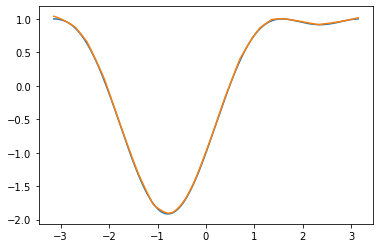

In [151]:
plt.plot(x, y)
plt.plot(x, model(xx).detach().numpy())

In [152]:
class DynamicNet(torch.nn.Module):
  def __init__(self):
    '''
    In the constructor we instantiate four parametrs and assign them as member 
    parametrs
    '''
    super().__init__()
    self.a = torch.nn.Parameter(torch.randn(()))
    self.b = torch.nn.Parameter(torch.randn(()))
    self.c = torch.nn.Parameter(torch.randn(()))
    self.d = torch.nn.Parameter(torch.randn(()))
    self.e = torch.nn.Parameter(torch.randn(()))

  def forward(self, x):
    '''
    In the forward function we accept Tensor of input data and we must return
    a Tensor of output data. We can use Modules definde in the constructor as
    well aebitary operations on Tensor
    '''
    y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    for exp in range(4, random.randint(4, 6)):
      y = y + self.e * x ** exp

    return y

  def string(self):
    '''
    You can define custom method on PyTorch modules
    '''

    return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 + {self.e.item()} x^5'


x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-08, momentum=0.9)

for t in range(30000):
  y_pred = model(x)

  loss = criterion(y_pred, y)
  if t % 2000 == 1999:
    print(t, loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


print(f'Results - {model.string()}')

1999 408.92962646484375
3999 184.4822998046875
5999 89.88980102539062
7999 48.28745651245117
9999 25.473655700683594
11999 16.3493595123291
13999 12.416801452636719
15999 10.254947662353516
17999 9.512763977050781
19999 9.157999992370605
21999 8.993365287780762
23999 8.929287910461426
25999 8.895341873168945
27999 8.569185256958008
29999 8.849714279174805
Results - y = 0.0027925362810492516 + 0.8559121489524841 x + -0.0010721392463892698 x^2 + -0.09340468049049377 x^3 + 0.00010531063890084624 x^4 + 0.00010531063890084624 x^5


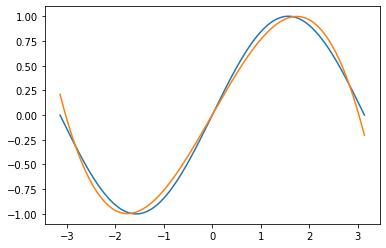

In [153]:
plt.plot(x, y)
plt.plot(x, model(x).detach().numpy())